Fold Number : 0 
Accuracy :  0.6495238095238095
Specificity :  0.7261904761904762
Sensitivity :  0.5132275132275133
Precision:  0.5132275132275133
F1-Score:  0.5132275132275133
FP:  92
FN:  92
TP:  97
TN:  244 

Fold Number : 1 
Accuracy :  0.6647619047619048
Specificity :  0.7247191011235955
Sensitivity :  0.5384615384615384
Precision:  0.48148148148148145
F1-Score:  0.5083798882681564
FP:  98
FN:  78
TP:  91
TN:  258 

Fold Number : 2 
Accuracy :  0.6514285714285715
Specificity :  0.7103825136612022
Sensitivity :  0.5157232704402516
Precision:  0.43617021276595747
F1-Score:  0.47262247838616717
FP:  106
FN:  77
TP:  82
TN:  260 

Fold Number : 3 
Accuracy :  0.6438095238095238
Specificity :  0.7130681818181818
Sensitivity :  0.5028901734104047
Precision:  0.4627659574468085
F1-Score:  0.481994459833795
FP:  101
FN:  86
TP:  87
TN:  251 

Fold Number : 4 
Accuracy :  0.6457142857142857
Specificity :  0.7046070460704607
Sensitivity :  0.5064102564102564
Precision:  0.42021276595744683


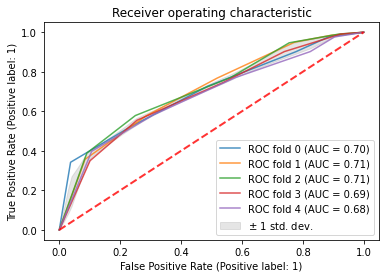

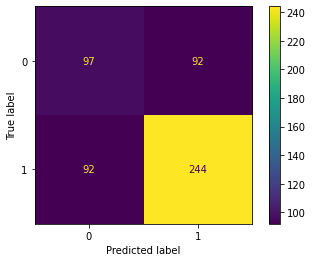

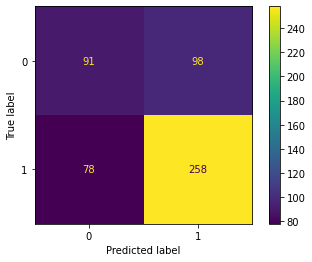

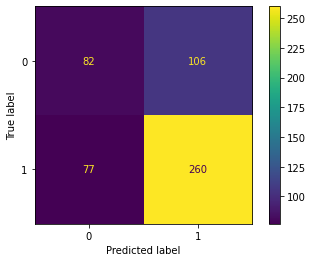

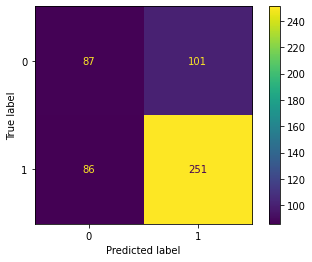

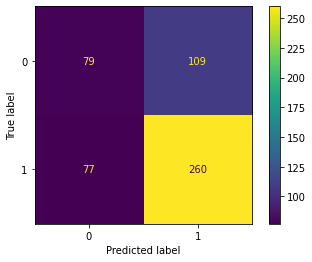

In [1]:
import numpy as np
import csv
from sklearn import metrics,utils
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve, confusion_matrix , roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split

def load_my_dataset(dataset):
    with open(dataset) as csv_file:
        data_file = csv.reader(csv_file)
        feature = []
        result = []
        for row in data_file:
            try:
                feature.append([float(row[0]), float(row[1])])
                result.append(int(row[2]))
            except ValueError:
                pass
        data = np.asarray(feature)
        target = np.asarray(result)
        feature_names = ['CDR', 'Exudate_pixel']
        target_names = ['other','non other']

    return utils.Bunch(data=data, target=target, feature_names = feature_names, target_names = target_names)
# Import some data to play with
data = load_my_dataset('Other_nonOther.csv')
X,y = data.data, data.target
n_samples, n_features = X.shape

acc_fold = []
model = []
predict = []
true = []
proba = []

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
classifier = KNeighborsClassifier(n_neighbors=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=100)

for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    classifier.fit(X_train[train], y_train[train])

    viz = plot_roc_curve(classifier, X_train[test], y_train[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.8, lw=1.5, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    model.append(classifier)
    y_pred = classifier.predict(X_train[test])
    predict.append(y_pred)
    proba.append(classifier.predict_proba(X_train[test]))
    true.append(y_train[test])

    conf_matrix = confusion_matrix(y_train[test],classifier.predict(X_train[test]))
    TP = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TN = conf_matrix[1][1]

    Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Specificity = TN/(TN+FP)
    sensitivity = TP / (TP + FN) ##recall
    Precision = TP / (TP+FP)
    F1 = 2*((Precision * sensitivity)/(Precision + sensitivity))

    acc_fold.append(Accuracy)
    
    print('Fold Number : %i ' %i )
    print('Accuracy : ',Accuracy)
    print('Specificity : ',Specificity)
    print('Sensitivity : ',sensitivity)
    print("Precision: ",Precision )
    print("F1-Score: ", F1)
    
    print("FP: ",FP)
    print("FN: ",FN)
    print("TP: ",TP)
    print("TN: ",TN,'\n')
    
    metrics.plot_confusion_matrix(classifier, X_train[test], y_train[test])
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
#ax.plot(mean_fpr, mean_tpr, color='b',
        #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        #lw=1, alpha=.6)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

Accuracy :  0.6575342465753424
Specificity :  0.5185185185185185
Sensitivity :  0.7391304347826086
Precision:  0.723404255319149
F1-Score:  0.7311827956989247
FP:  52
FN:  48
TP:  136
TN:  56 



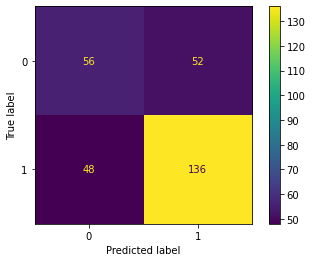

In [2]:
best_model = model[acc_fold.index(max(acc_fold))]
test_model = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_model)
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
Accuracy = (TP+TN)/(TP+FP+FN+TN)
acc_fold.append(Accuracy)
Specificity = TN/(TN+FP)
sensitivity = TP / (TP + FN) ##recall
Precision = TP / (TP+FP)
F1 = 2*((Precision * sensitivity)/(Precision + sensitivity))


print('Accuracy : ',Accuracy)
print('Specificity : ',Specificity)
print('Sensitivity : ',sensitivity)
print("Precision: ",Precision )
print("F1-Score: ", F1)
    
print("FP: ",FP)
print("FN: ",FN)
print("TP: ",TP)
print("TN: ",TN,'\n')
metrics.plot_confusion_matrix(classifier, X_test, y_test)